# **Algoritma *K-Means***

### **Pengertiann K-Means Clustering**

K-Means Clustering adalah  salah satu algoritma unsupervised learning yang digunakan untuk mengelompokkan data ke dalam beberapa grup (disebut cluster) berdasarkan kemiripan fitur atau atributnya. Tujuan dari algoritma ini adalah untuk membagi data ke dalam k kelompok sedemikian rupa sehingga data dalam satu kelompok memiliki karakteristik yang mirip dan berbeda dari data di kelompok lain.



#### **Manfaat Clustering**
Clustering merupakan metode segmentasi data yang sangat bermanfaat dalam berbagai analisis dan prediksi permasalahan bisnis. Beberapa contohnya meliputi segmentasi pasar, strategi pemasaran (marketing), dan pemetaan zonasi wilayah.



Selain dalam dunia bisnis, clustering juga digunakan dalam berbagai bidang lain, seperti computer vision dan image processing, untuk mengidentifikasi objek dalam citra atau video.



Hasil clustering yang baik ditandai dengan tingkat kesamaan yang tinggi di dalam satu kelompok (intra-cluster similarity) dan tingkat kesamaan yang rendah antar kelompok (inter-cluster similarity). Kesamaan ini diukur secara numerik antara dua objek; semakin tinggi nilai kesamaan, maka semakin mirip kedua objek tersebut. Sebaliknya, jika nilai kesamaan rendah, berarti kedua objek sangat berbeda.



Kualitas hasil clustering sangat bergantung pada metode yang digunakan, serta pada pemilihan parameter dan representasi data yang tepat.










### **Inertia (Sum of Squared Error / SSE)**
Dalam algoritma K-Means Clustering, inertia atau Sum of Squared Error (SSE) adalah salah satu metrik evaluasi yang digunakan untuk mengukur seberapa baik data dikelompokkan ke dalam klaster. Inertia menghitung total jumlah kuadrat jarak antara setiap titik data dan pusat klaster (centroid) tempat titik tersebut berada.

Rumus Inertia
$$
\text{Inertia} = \sum_{i=1}^{n} \left\| x_i - \mu_{c_i} \right\|^2
$$

**Penjelasan Notasi:**

- $x_i$: Vektor fitur berdimensi-$d$ yang merepresentasikan titik data ke-$i$ dalam ruang multidimensi $\mathbb{R}^d$. Titik ini merupakan bagian dari himpunan data yang akan dikelompokkan.


- $\mu_{c_i}$: Titik pusat (centroid) dari klaster tempat $x_i$ dialokasikan. Centroid merupakan nilai rata-rata dari seluruh titik data dalam satu klaster dan dihitung sebagai representasi sentral dari klaster tersebut.


- $\left| x_i - \mu_{c_i} \right|^2$: Merupakan jarak Euclidean kuadrat antara titik data $x_i$ dan centroid klasternya. Nilai ini menggambarkan seberapa jauh penyimpangan (dalam bentuk kuadrat) titik $x_i$ dari pusat klasternya. Penggunaan kuadrat bertujuan untuk menekankan kontribusi error besar dan menjamin semua nilai bersifat non-negatif.


- $n$: Jumlah total titik data dalam himpunan, yang digunakan sebagai batas atas indeks penjumlahan. Semakin besar $n$, semakin kompleks struktur klaster dan komputasi yang diperlukan untuk minimisasi inertia.


## **Silhouette Analysis**
Silhouette Analysis adalah metode evaluasi yang digunakan untuk menilai kualitas hasil clustering dengan cara mengukur seberapa mirip suatu data dengan klaster-nya sendiri dibandingkan dengan klaster lainnya. Metode ini memberikan nilai koefisien silhouette untuk masing-masing titik data.



Nilai Silhouette

 $$
s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
$$


**Penjelasan:**
- $a(i)$: Rata-rata jarak Euclidean dari titik data $i$ ke seluruh titik lain dalam klaster yang sama. Nilai ini mengukur tingkat kedekatan internal (intra-cluster cohesion) dan menunjukkan seberapa erat titik $i$ terhubung dengan anggota klasternya sendiri. Semakin kecil nilai $a(i)$, semakin baik kohesi titik terhadap klaster-nya.


- $b(i)$: Rata-rata jarak dari titik data $i$ ke seluruh titik dalam klaster lain yang paling dekat (dalam hal rata-rata jarak), atau dikenal sebagai nearest neighboring cluster. Nilai ini mengukur tingkat inter-cluster separation dan menggambarkan jarak terdekat titik $i$ terhadap klaster lain yang bukan miliknya.


- $s(i)$: Nilai Silhouette Score untuk titik data $i$, dihitung menggunakan formula:


$$
s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
$$


Nilai ini memberikan indikator kuantitatif mengenai kualitas penempatan titik $i$ dalam klaster saat ini. Skor ini berada dalam rentang [-1, 1].


**Interpretasi Nilai $s(i)$:**

- Jika $s(i) \approx 1$: Titik data sangat sesuai dengan klaster-nya dan sangat tidak mirip dengan klaster lain. Ini menunjukkan penempatan yang sangat baik.


- Jika $s(i) \approx 0$: Titik data berada dekat dengan batas antara dua klaster dan berpotensi ambigu; tidak jelas lebih cocok di klaster saat ini atau klaster lain.


- Jika $s(i) \approx -1$: Titik data kemungkinan besar lebih cocok ditempatkan di klaster lain, karena lebih dekat dengan pusat klaster lain daripada dengan klaster-nya sendiri. Ini adalah indikasi dari klasterisasi yang buruk atau keliru.


Untuk mengevaluasi keseluruhan performa model clustering, digunakan rata-rata dari seluruh nilai $s(i)$ untuk semua titik data dalam dataset. Nilai rata-rata yang tinggi (mendekati 1) menunjukkan pembentukan klaster yang baik secara keseluruhan, sedangkan nilai mendekati 0 atau negatif menunjukkan masalah dalam struktur klaster yang terbentuk, seperti tumpang tindih antar klaster atau penempatan yang tidak tepat.




## **Implementasi menggunakan data Iris**

In [23]:
%pip install pymysql
%pip install psycopg2

## **Library yang digunakan**

In [24]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import silhouette_score
import psycopg2
import pymysql
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## **Pengumpulan Data**

In [25]:
def get_pg_data():
    conn = psycopg2.connect(
        host="pg-1d952496-dinaaa-269a.i.aivencloud.com",
        user="avnadmin",
        password="AVNS_n1Ru1Ddse4sg_Gpi7Nb",
        database="defaultdb",
        port=27730
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM tabel_b")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]  # Ambil nama kolom
    cursor.close()
    conn.close()

    return pd.DataFrame(data, columns=columns)

def get_mysql_data():
    conn = pymysql.connect(
        host="mysql-e89c328-dinaaa-269a.i.aivencloud.com",
        user="avnadmin",
        password="AVNS_GBbKfVRE1qvWkI6gU2s",
        database="iris_a",
        port=27730
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM tabel_a")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]  # Ambil nama kolom
    cursor.close()
    conn.close()

    return pd.DataFrame(data, columns=columns)

# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()

# Gabungkan berdasarkan kolom 'id' dan 'Class'
df_merged = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Cetak semua data hasil gabungan tanpa indeks
print(df_merged.to_string(index=False))

 id           class  petal_length  petal_width  sepal_length  sepal_width
  1     Iris-setosa           1.4          0.2           5.1          3.5
  2     Iris-setosa          14.0         20.0           4.9          3.0
  3     Iris-setosa           1.3          0.2           4.7          3.2
  4     Iris-setosa           1.5          0.2           4.6          3.1
  5     Iris-setosa           1.4          0.2           5.0          3.6
  6     Iris-setosa          20.0         15.0           5.4          3.9
  7     Iris-setosa           1.4          0.3           4.6          3.4
  8     Iris-setosa           1.5          0.2           5.0          3.4
  9     Iris-setosa          60.0         49.0          40.0         57.0
 10     Iris-setosa          36.0         25.0           4.9          3.1
 11     Iris-setosa           1.5          0.2           5.4          3.7
 12     Iris-setosa           1.6          0.2           4.8          3.4
 13     Iris-setosa           1.4     

## **Clustering pada data Iris menggunakan K-Means dengan jumlah cluster 2,3 dan 4**

In [26]:
# 1. Siapkan fitur (X) dan label (y)
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = df_merged[feature_names].values
y = df_merged['class'].astype('category').cat.codes.values  # label dikodekan ke angka

# 2. Standarisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Fungsi clustering
def perform_kmeans(X_scaled, y, k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    centroids = kmeans.cluster_centers_
    accuracy = adjusted_rand_score(y, labels)

    print(f"\nHasil K-Means dengan {k} Klaster:")
    print(f"Centroids:\n{centroids}")
    print(f"Akurasi (Adjusted Rand Score): {accuracy:.3f}")

    return labels, centroids, accuracy

# 4. Jalankan clustering
for k in [2, 3, 4]:
    perform_kmeans(X_scaled, y, k)


Hasil K-Means dengan 2 Klaster:
Centroids:
[[ 2.12636969  1.9817106   1.20410919  1.19597645]
 [-0.3271338  -0.30487855 -0.18524757 -0.18399638]]
Akurasi (Adjusted Rand Score): -0.003

Hasil K-Means dengan 3 Klaster:
Centroids:
[[ 2.94001325e+00  2.74277977e+00  1.55057767e-01  1.60845048e-03]
 [-3.27133799e-01 -3.04878554e-01 -1.85247567e-01 -1.83996376e-01]
 [-3.14560987e-01 -3.01496906e-01  4.35126344e+00  4.77908043e+00]]
Akurasi (Adjusted Rand Score): -0.003

Hasil K-Means dengan 4 Klaster:
Centroids:
[[ 3.05505165  2.16385122  0.26129082  0.06828433]
 [-0.3271338  -0.30487855 -0.18524757 -0.18399638]
 [-0.31456099 -0.30149691  4.35126344  4.77908043]
 [ 2.47985967  5.05849395 -0.26987445 -0.26509508]]
Akurasi (Adjusted Rand Score): -0.003


## **Model Plotting dengan Jumlah Cluster 2, 3 dan 4**

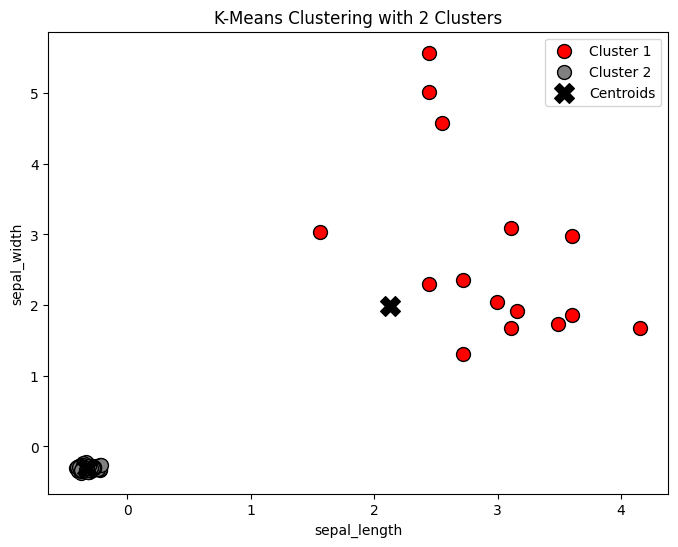

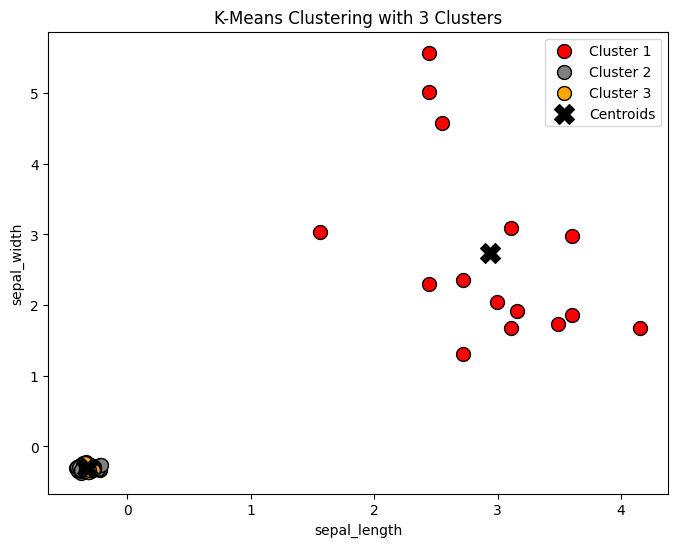

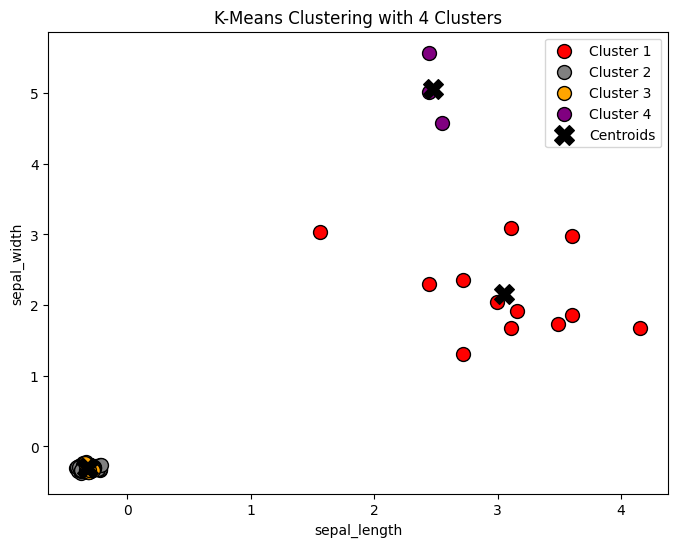

In [27]:
# 1. Siapkan fitur (X) dan label (y)
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = df_merged[feature_names].values
y = df_merged['class'].astype('category').cat.codes.values  # label dikodekan ke angka

# 2. Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Fungsi K-Means + plot tanpa cmap
def perform_kmeans_plot(X_scaled, k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    centroids = kmeans.cluster_centers_

    plt.figure(figsize=(8, 6))

    # Daftar warna manual (pastikan cukup untuk jumlah klaster)
    colors = ['red', 'gray', 'orange', 'purple']

    for cluster in range(k):
        cluster_points = X_scaled[labels == cluster]
        plt.scatter(
            cluster_points[:, 0], cluster_points[:, 1],
            c=colors[cluster % len(colors)], label=f'Cluster {cluster + 1}',
            s=100, edgecolors='k'
        )

    # Plot centroid
    plt.scatter(
        centroids[:, 0], centroids[:, 1],
        c='black', marker='X', s=200, label='Centroids'
    )

    plt.title(f"K-Means Clustering with {k} Clusters")
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.legend()
    plt.show()

# 4. Jalankan untuk K = 2, 3, dan 4
for k in [2, 3, 4]:
    perform_kmeans_plot(X_scaled, k)

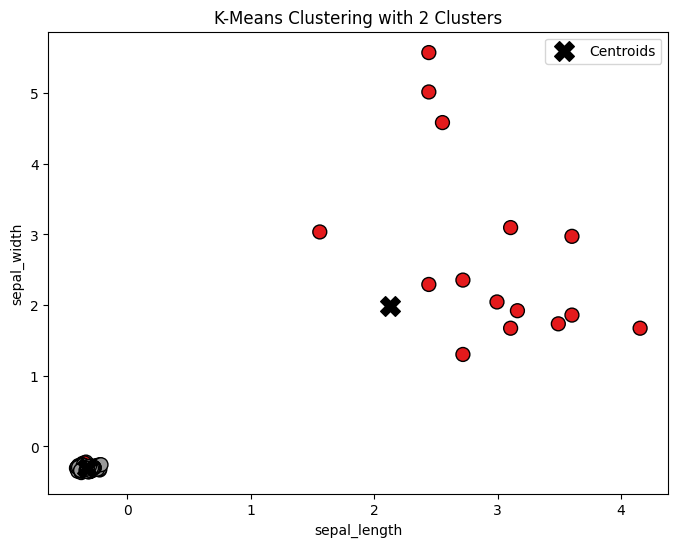

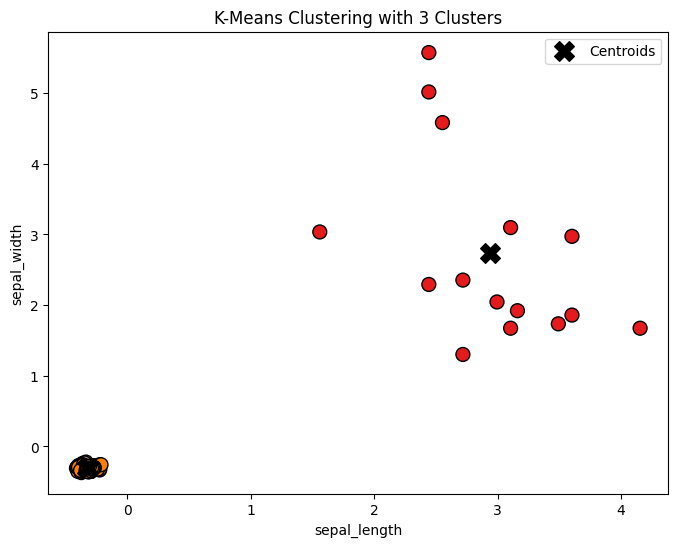

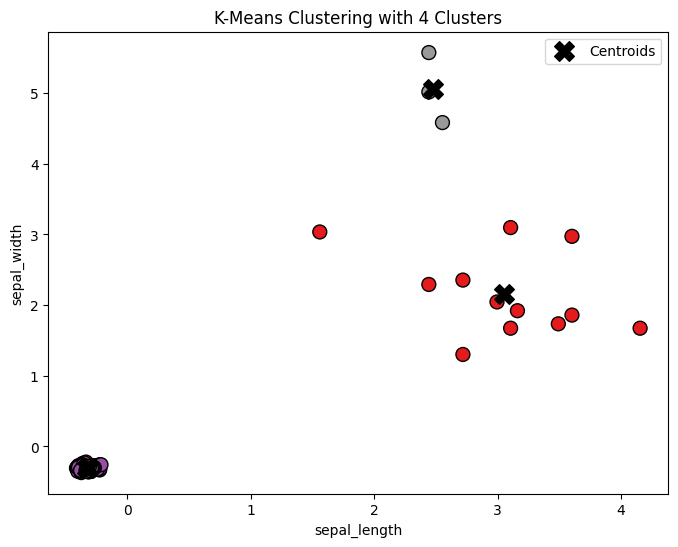

In [28]:
# 1. Siapkan fitur (X) dan label (y)
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = df_merged[feature_names].values
y = df_merged['class'].astype('category').cat.codes.values  # label dikodekan ke angka

# 2. Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Fungsi untuk melakukan K-Means, plotting dan menampilkan centroid
def perform_kmeans_plot(X_scaled, k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)

    # Centroid dari masing-masing klaster
    centroids = kmeans.cluster_centers_

    # Plotting data dan centroid
    plt.figure(figsize=(8, 6))

    # Scatter plot untuk 2 fitur pertama (sepal length & sepal width)
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='Set1', marker='o', edgecolors='k', s=100)

    # Plot centroid dengan warna berbeda
    plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='X', s=200, label='Centroids')

    plt.title(f"K-Means Clustering with {k} Clusters")
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.legend()
    plt.show()

# 4. Melakukan clustering dengan K=2, K=3, dan K=4 dan plot hasilnya
for k in [2, 3, 4]:
    perform_kmeans_plot(X_scaled, k)


## **Menghitung Inertia untuk Jumlah Cluster 2,3 dan 4**

In [29]:
# 1. Siapkan fitur (X) dan label (y)
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = df_merged[feature_names].values
y = df_merged['class'].astype('category').cat.codes.values  # label dikodekan ke angka

# 2. Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Fungsi untuk menghitung inertia secara manual
def calculate_inertia_step_by_step(X_scaled, labels, centroids):
    inertia = 0
    print("Langkah-langkah perhitungan Inertia:")

    for i in range(len(X_scaled)):
        cluster = labels[i]
        distance = np.linalg.norm(X_scaled[i] - centroids[cluster]) ** 2
        inertia += distance
        print(f"Titik data {i+1} (Fitur: {X_scaled[i]}), Klaster: {cluster}, "
              f"Centroid: {centroids[cluster]}, Jarak kuadrat: {distance:.3f}, "
              f"Inertia sementara: {inertia:.3f}")

    return inertia

# 4. Fungsi untuk menjalankan KMeans dan menghitung inertia manual
def perform_kmeans(X_scaled, y, k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    centroids = kmeans.cluster_centers_

    print(f"\n=== Hasil K-Means dengan {k} Klaster ===")
    print(f"Centroids (fitur hasil standarisasi):\n{centroids}")

    # Hitung inertia manual
    manual_inertia = calculate_inertia_step_by_step(X_scaled, labels, centroids)
    print(f"\nTotal Inertia Manual: {manual_inertia:.3f}")

    # Bandingkan dengan inertia dari sklearn
    sklearn_inertia = kmeans.inertia_
    print(f"Inertia dari sklearn: {sklearn_inertia:.3f}")
    print("="*50)

    return labels, centroids, manual_inertia

# 5. Jalankan untuk k=2, 3, dan 4
for k in [2, 3, 4]:
    perform_kmeans(X_scaled, y, k)



=== Hasil K-Means dengan 2 Klaster ===
Centroids (fitur hasil standarisasi):
[[ 2.12636969  1.9817106   1.20410919  1.19597645]
 [-0.3271338  -0.30487855 -0.18524757 -0.18399638]]
Langkah-langkah perhitungan Inertia:
Titik data 1 (Fitur: [-0.36757068 -0.27672991 -0.4802159  -0.36047994]), Klaster: 1, Centroid: [-0.3271338  -0.30487855 -0.18524757 -0.18399638], Jarak kuadrat: 0.121, Inertia sementara: 0.121
Titik data 2 (Fitur: [-0.37861437 -0.30768866  0.32290599  0.75047307]), Klaster: 1, Centroid: [-0.3271338  -0.30487855 -0.18524757 -0.18399638], Jarak kuadrat: 1.134, Inertia sementara: 1.255
Titik data 3 (Fitur: [-0.38965805 -0.29530516 -0.48658989 -0.36047994]), Klaster: 1, Centroid: [-0.3271338  -0.30487855 -0.18524757 -0.18399638], Jarak kuadrat: 0.126, Inertia sementara: 1.381
Titik data 4 (Fitur: [-0.39517989 -0.30149691 -0.47384192 -0.36047994]), Klaster: 1, Centroid: [-0.3271338  -0.30487855 -0.18524757 -0.18399638], Jarak kuadrat: 0.119, Inertia sementara: 1.500
Titik data

## **Model Plotting Diagram Elbow Method**

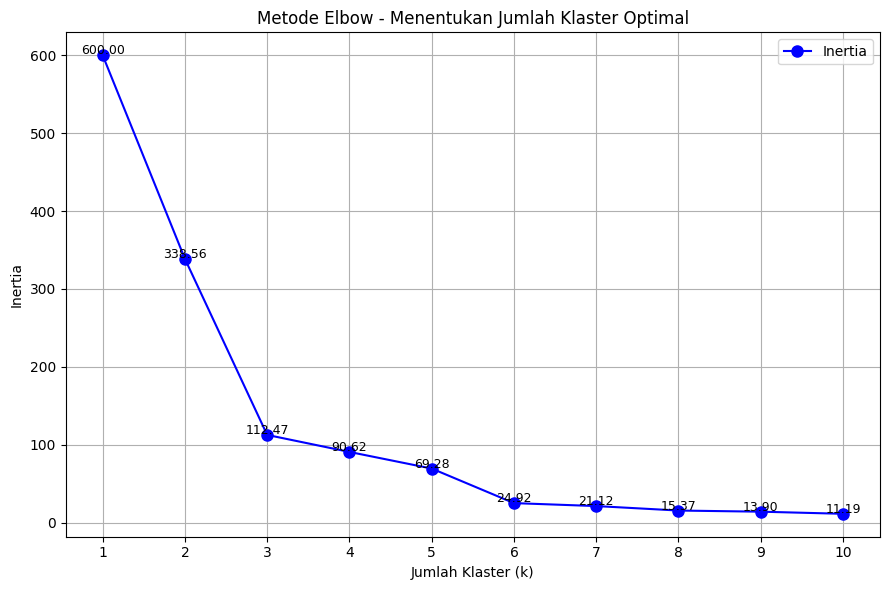

In [30]:
# 1. Siapkan fitur (X) dan label (y)
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = df_merged[feature_names].values
y = df_merged['class'].astype('category').cat.codes.values  # label dikodekan ke angka

# 2. Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Hitung inertia untuk berbagai nilai k
inertias = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# 4. Plot Elbow Diagram
plt.figure(figsize=(9, 6))
plt.plot(K_range, inertias, 'bo-', markersize=8, label='Inertia')
plt.title("Metode Elbow - Menentukan Jumlah Klaster Optimal")
plt.xlabel("Jumlah Klaster (k)")
plt.ylabel("Inertia")
plt.xticks(K_range)
plt.grid(True)

# Tambahkan label inertia di tiap titik
for i, inertia in enumerate(inertias):
    plt.text(K_range[i], inertias[i] + 1, f"{inertia:.2f}", ha='center', fontsize=9)

plt.legend()
plt.tight_layout()
plt.show()

## **Menghitung Silhouette Score untuk Jumlah Cluster 2,3 dan 4**


=== Hasil K-Means dengan 2 Klaster ===
Centroids:
[[ 2.12636969  1.9817106   1.20410919  1.19597645]
 [-0.3271338  -0.30487855 -0.18524757 -0.18399638]]
Silhouette Score untuk 2 klaster: 0.808

=== Hasil K-Means dengan 3 Klaster ===
Centroids:
[[ 2.94001325e+00  2.74277977e+00  1.55057767e-01  1.60845048e-03]
 [-3.27133799e-01 -3.04878554e-01 -1.85247567e-01 -1.83996376e-01]
 [-3.14560987e-01 -3.01496906e-01  4.35126344e+00  4.77908043e+00]]
Silhouette Score untuk 3 klaster: 0.855

=== Hasil K-Means dengan 4 Klaster ===
Centroids:
[[ 3.05505165  2.16385122  0.26129082  0.06828433]
 [-0.3271338  -0.30487855 -0.18524757 -0.18399638]
 [-0.31456099 -0.30149691  4.35126344  4.77908043]
 [ 2.47985967  5.05849395 -0.26987445 -0.26509508]]
Silhouette Score untuk 4 klaster: 0.850

>>> Jumlah cluster terbaik dengan dengan Silhouette Score mendekati 1 adalah k = 3 (dengan score = 0.855)


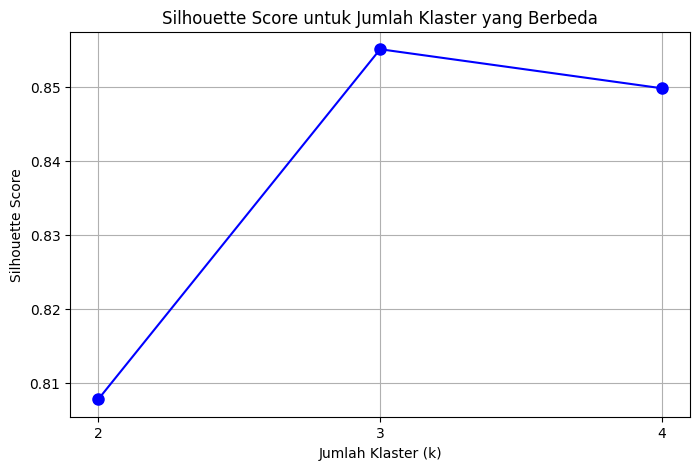

In [31]:
# 1. Siapkan fitur (X) dan label (y)
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = df_merged[feature_names].values
y = df_merged['class'].astype('category').cat.codes.values  # label dikodekan ke angka

# 2. Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Fungsi untuk melakukan K-Means dan menghitung Silhouette Score
def perform_kmeans_with_silhouette(X_scaled, k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)

    # Menghitung Silhouette Score
    silhouette_avg = silhouette_score(X_scaled, labels)

    # Centroid dari masing-masing klaster
    centroids = kmeans.cluster_centers_

    # Output hasil untuk klaster k
    print(f"\n=== Hasil K-Means dengan {k} Klaster ===")
    print(f"Centroids:\n{centroids}")
    print(f"Silhouette Score untuk {k} klaster: {silhouette_avg:.3f}")

    return silhouette_avg

# 4. Melakukan clustering dan menghitung Silhouette Score untuk k=2, 3, dan 4
silhouette_scores = []
k_values = [2, 3, 4]

for k in k_values:
    score = perform_kmeans_with_silhouette(X_scaled, k)
    silhouette_scores.append(score)

# 5. Menentukan k dengan Silhouette Score terbaik
best_k = k_values[np.argmax(silhouette_scores)]
best_score = max(silhouette_scores)
print(f"\n>>> Jumlah cluster terbaik dengan dengan Silhouette Score mendekati 1 adalah k = {best_k} (dengan score = {best_score:.3f})")

# 6. Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, 'bo-', markersize=8)
plt.title("Silhouette Score untuk Jumlah Klaster yang Berbeda")
plt.xlabel("Jumlah Klaster (k)")
plt.ylabel("Silhouette Score")
plt.xticks(k_values)
plt.grid(True)
plt.show()